In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


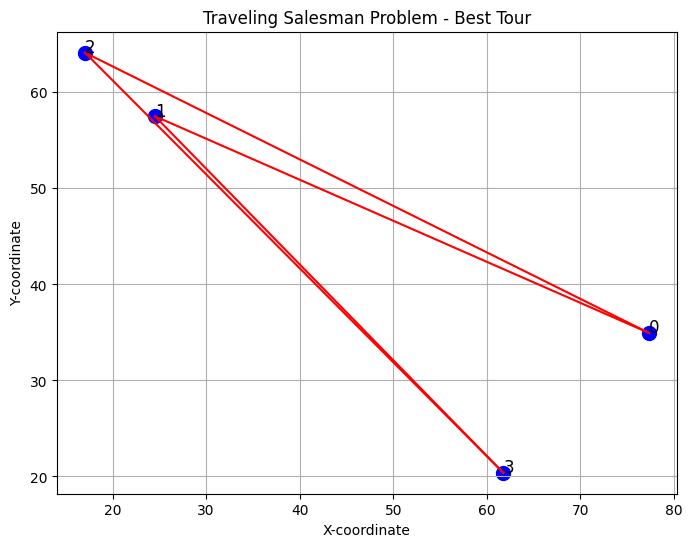

Best Tour: [3, 1, 0, 2]
Best Distance: 80


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to calculate the total distance of a tour
def total_distance(tour, distances):
    total = 0
    for i in range(len(tour)):
        total += distances[tour[i - 1]][tour[i % len(tour)]]
    return total

# Function to generate a random initial tour
def initial_tour(num_cities):
    tour = list(range(num_cities))
    random.shuffle(tour)
    return tour

# Function to generate a neighboring solution by swapping two cities
def perturb_tour(tour):
    i, j = sorted(random.sample(range(len(tour)), 2))
    tour[i:j + 1] = reversed(tour[i:j + 1])
    return tour

# Simulated annealing algorithm
def simulated_annealing(distances, max_iterations, initial_temperature, cooling_rate):
    num_cities = len(distances)
    current_tour = initial_tour(num_cities)
    current_distance = total_distance(current_tour, distances)
    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temperature

    for iteration in range(max_iterations):
        new_tour = perturb_tour(current_tour)
        new_distance = total_distance(new_tour, distances)

        # Calculate acceptance probability
        if new_distance < current_distance or random.random() < math.exp(
                (current_distance - new_distance) / temperature):
            current_tour = new_tour
            current_distance = new_distance

            # Update the best tour if needed
            if current_distance < best_distance:
                best_tour = current_tour[:]
                best_distance = current_distance

        # Cool down the temperature
        temperature *= cooling_rate

    return best_tour, best_distance

# Example distances between cities (replace with your own data)
distances = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

max_iterations = 10000
initial_temperature = 1000.0
cooling_rate = 0.99

# Perform simulated annealing
best_tour, best_distance = simulated_annealing(distances, max_iterations, initial_temperature, cooling_rate)

# Visualization
cities = len(distances)
x = [random.random() * 100 for _ in range(cities)]
y = [random.random() * 100 for _ in range(cities)]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', s=100)
for i, txt in enumerate(range(cities)):
    plt.annotate(txt, (x[i], y[i]), fontsize=12)

for i in range(cities - 1):
    plt.plot([x[best_tour[i]], x[best_tour[i + 1]]], [y[best_tour[i]], y[best_tour[i + 1]]], c='red')
plt.plot([x[best_tour[-1]], x[best_tour[0]]], [y[best_tour[-1]], y[best_tour[0]]], c='red')

plt.title("Traveling Salesman Problem - Best Tour")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid(True)
plt.show()

print("Best Tour:", best_tour)
print("Best Distance:", best_distance)


Best tour: ['Jaipur', 'Bundi', 'Nathdwara', 'Jodhpur', 'Pushkar', 'Ajmer', 'Shekhawati', 'Mandawa', 'Bikaner', 'Osian', 'Jaisalmer', 'Mount Abu', 'Dungarpur', 'Udaipur', 'Chittorgarh', 'Kota', 'Ranthambore', 'Sawai Madhopur', 'Bharatpur', 'Alwar', 'Jaipur']
Best cost: 2716.7731798340787 km
Intermediary distances: [164.16839137424935, 191.9002941424179, 165.7291974684814, 154.64832486598584, 9.885013534052195, 194.63896258428522, 89.0449913216742, 179.63773219478168, 153.3708937487018, 147.08141630357827, 315.41463711200504, 131.63476288345583, 83.2963195724022, 98.31189167027026, 129.8329108304392, 84.71768151850819, 14.975836091882607, 186.72747366954252, 111.79489760531241, 109.96155134205267]


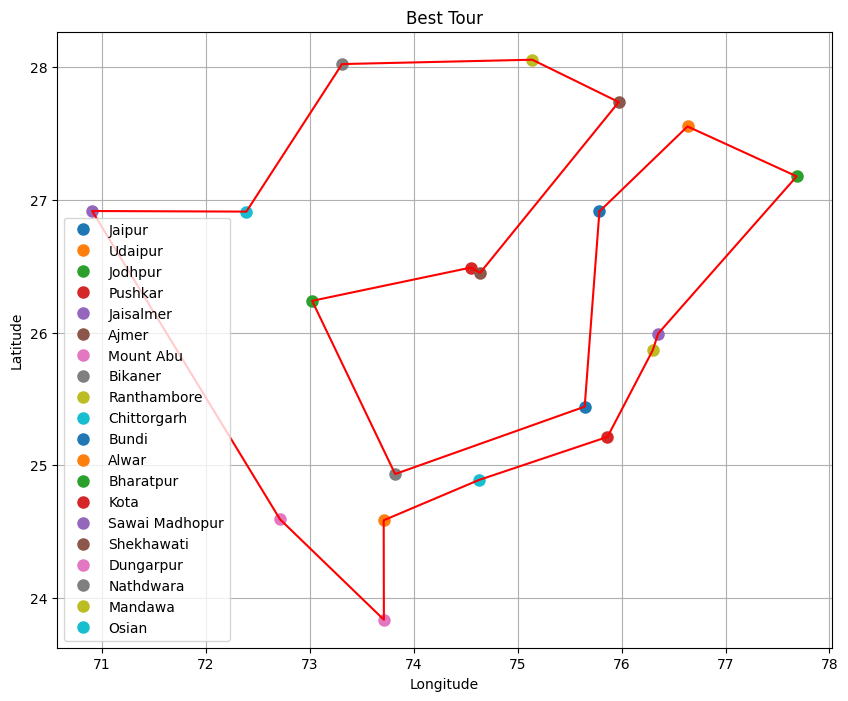

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Define the tourist locations in Rajasthan
rajasthan_locations = {
    "Jaipur": (26.9124, 75.7873),
    "Udaipur": (24.5854, 73.7125),
    "Jodhpur": (26.2389, 73.0243),
    "Pushkar": (26.4897, 74.5511),
    "Jaisalmer": (26.9157, 70.9083),
    "Ajmer": (26.4499, 74.6399),
    "Mount Abu": (24.5925, 72.7156),
    "Bikaner": (28.0229, 73.3119),
    "Ranthambore": (25.8667, 76.3),
    "Chittorgarh": (24.8887, 74.6269),
    "Bundi": (25.4415, 75.6454),
    "Alwar": (27.5530, 76.6346),
    "Bharatpur": (27.1767, 77.6844),
    "Kota": (25.2138, 75.8648),
    "Sawai Madhopur": (25.9928, 76.3526),
    "Shekhawati": (27.7366, 75.9730),
    "Dungarpur": (23.8363, 73.7143),
    "Nathdwara": (24.9339, 73.8226),
    "Mandawa": (28.0556, 75.1419),
    "Osian": (26.9112, 72.3917)
}

# Calculate distance between two locations using Haversine formula
def distance(location1, location2):
    lat1, lon1 = location1
    lat2, lon2 = location2
    radius = 6371  # Radius of Earth in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

# Calculate total distance of a tour
def total_distance(tour):
    total = 0
    for i in range(len(tour)):
        total += distance(rajasthan_locations[tour[i]], rajasthan_locations[tour[(i + 1) % len(tour)]])
    return total

# Simulated Annealing algorithm with distance tracking
def simulated_annealing_with_distances(locations, initial_temperature=1000, cooling_rate=0.99, num_iterations=100000):
    current_solution = list(locations.keys())
    random.shuffle(current_solution)
    current_cost = total_distance(current_solution)
    best_solution = current_solution[:]
    best_cost = current_cost

    temperature = initial_temperature
    distances = []

    for _ in range(num_iterations):
        # Generate a new solution by swapping two random locations
        new_solution = current_solution[:]
        i, j = random.sample(range(len(new_solution)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        # Calculate the cost of the new solution
        new_cost = total_distance(new_solution)

        # If the new solution is better or accepted by probability, update current solution
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
            current_solution = new_solution[:]
            current_cost = new_cost

            # If the new solution is the best so far, update best solution
            if new_cost < best_cost:
                best_solution = new_solution[:]
                best_cost = new_cost

        # Add current distance to array
        distances.append(current_cost)

        # Cooling schedule
        temperature *= cooling_rate

    # Ensure the tour forms a cycle
    best_solution.append(best_solution[0])

    return best_solution, best_cost, distances

# Run simulated annealing to find an optimized tour with distances
best_tour, best_cost, distances = simulated_annealing_with_distances(rajasthan_locations)

# Extract intermediary distances for the final route
intermediary_distances = []
for i in range(len(best_tour) - 1):
    city1 = best_tour[i]
    city2 = best_tour[i + 1]
    intermediary_distances.append(distance(rajasthan_locations[city1], rajasthan_locations[city2]))

# Print the results
print("Best tour:", best_tour)
print("Best cost:", best_cost, "km")
print("Intermediary distances:", intermediary_distances)

# Visualization
plt.figure(figsize=(10, 8))
for city, (lat, lon) in rajasthan_locations.items():
    plt.plot(lon, lat, 'o', markersize=8, label=city)
plt.plot([rajasthan_locations[best_tour[i]][1] for i in range(len(best_tour))],
         [rajasthan_locations[best_tour[i]][0] for i in range(len(best_tour))],
         'r-')
plt.title('Best Tour')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


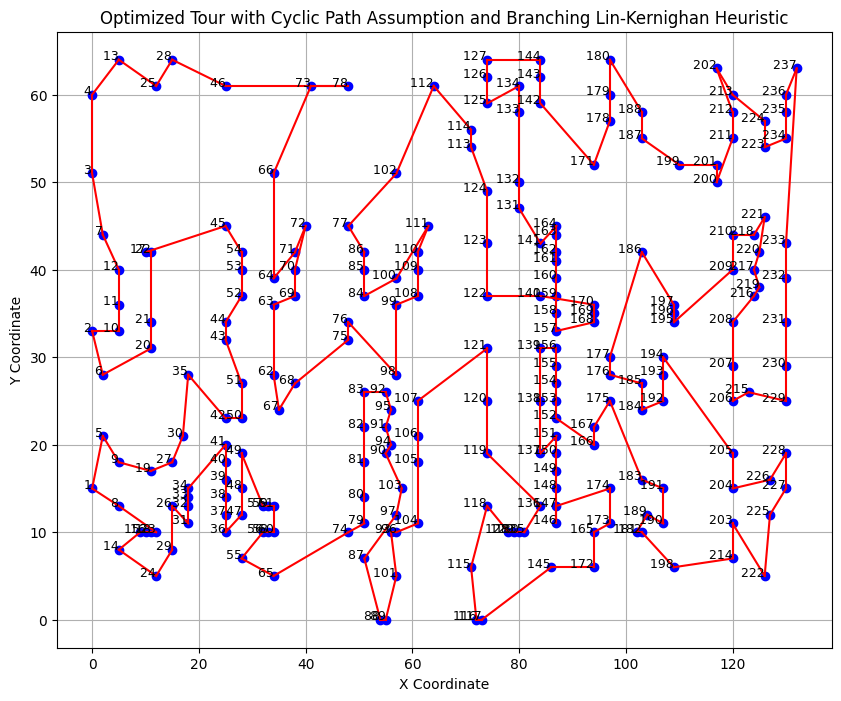

Best tour: [1, 8, 23, 18, 16, 15, 14, 24, 29, 26, 31, 32, 33, 34, 41, 40, 39, 38, 37, 36, 47, 48, 49, 57, 59, 61, 60, 58, 56, 55, 65, 74, 79, 80, 81, 82, 83, 92, 95, 91, 94, 90, 103, 97, 87, 88, 89, 101, 93, 96, 104, 105, 106, 107, 121, 120, 119, 136, 135, 130, 129, 128, 118, 115, 116, 117, 145, 172, 165, 173, 174, 147, 146, 148, 149, 150, 151, 137, 138, 139, 156, 155, 154, 153, 152, 166, 167, 175, 183, 191, 190, 189, 181, 182, 198, 214, 203, 222, 225, 227, 228, 226, 204, 205, 194, 193, 192, 184, 185, 176, 177, 186, 197, 196, 195, 209, 210, 218, 221, 220, 217, 219, 216, 208, 207, 206, 215, 229, 230, 231, 232, 233, 237, 236, 235, 234, 223, 224, 213, 202, 212, 211, 200, 201, 199, 187, 188, 180, 179, 178, 171, 142, 143, 144, 127, 126, 125, 134, 133, 132, 131, 141, 164, 163, 162, 161, 160, 159, 158, 157, 168, 169, 170, 140, 122, 123, 124, 113, 114, 112, 102, 77, 86, 85, 84, 100, 111, 110, 109, 108, 99, 98, 76, 75, 68, 67, 62, 63, 69, 70, 72, 71, 64, 66, 73, 78, 46, 28, 25, 13, 4, 3, 7, 12,

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Function to read .tsp file and extract city coordinates
def read_tsp_file(filename):
    cities = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        coord_section_index = lines.index('NODE_COORD_SECTION\n') + 1
        for line in lines[coord_section_index:]:
            if line.strip() == 'EOF':
                break
            parts = line.strip().split()
            city_id = int(parts[0])
            x_coord = float(parts[1])
            y_coord = float(parts[2])
            cities[city_id] = (x_coord, y_coord)
    return cities

# Function to calculate Euclidean distance between two cities
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Function to calculate total distance of a tour
def total_distance(tour, cities):
    total = 0
    for i in range(len(tour)):
        total += distance(cities[tour[i]], cities[tour[(i + 1) % len(tour)]])
    return total

# Function to perform Lin-Kernighan heuristic for TSP with branching and cyclic path assumption
def lin_kernighan_tsp_cyclic_branching(cities, start_city, num_candidates=10, num_iterations=1000):
    best_tour = None
    best_cost = float('inf')

    for _ in range(num_candidates):
        tour = [start_city]  # Start with the specified starting city
        current_city = start_city
        current_cost = 0

        # Generate a candidate tour
        for _ in range(len(cities) - 1):
            # Find the next city to visit
            next_city = None
            min_distance = float('inf')
            for city_id, city_coords in cities.items():
                if city_id not in tour:
                    dist = distance(cities[current_city], city_coords)
                    if dist < min_distance:
                        min_distance = dist
                        next_city = city_id
            tour.append(next_city)
            current_cost += min_distance
            current_city = next_city

        # Ensure the tour ends with the start city
        tour.append(start_city)
        current_cost += distance(cities[current_city], cities[start_city])

        # Improve the tour using Lin-Kernighan heuristic
        for _ in range(num_iterations):
            i, j = random.sample(range(1, len(tour) - 1), 2)  # Exclude the start city from swapping

            # Define the segment as (tour[i], tour[j]) and its reverse (tour[j], tour[i])
            segment = (tour[i], tour[j])
            reverse_segment = (tour[j], tour[i])

            # Find potential candidates for swapping
            candidates = []
            for k in range(1, len(tour) - 1):
                if tour[k] not in segment:
                    # Calculate the gain if tour[k] is swapped with the segment
                    gain = distance(cities[tour[i]], cities[tour[k]]) + distance(cities[tour[j]], cities[tour[(k + 1) % len(tour)]]) - distance(cities[tour[i]], cities[tour[j]]) - distance(cities[tour[k]], cities[tour[(k + 1) % len(tour)]])
                    candidates.append((k, gain))

            # Sort candidates by gain
            candidates.sort(key=lambda x: x[1], reverse=True)

            # Perform the best gainful exchange
            for k, gain in candidates:
                if gain > 0:
                    new_tour = tour[:k + 1] + list(reversed(tour[k + 1:j + 1])) + tour[(j + 1) % len(tour):]
                    new_cost = total_distance(new_tour, cities)
                    if new_cost < current_cost:
                        tour = new_tour[:]
                        current_cost = new_cost

        # Update best tour if current tour is better
        if current_cost < best_cost:
            best_tour = tour[:]
            best_cost = current_cost

    return best_tour, best_cost

# Read .tsp file
filename = '/content/drive/MyDrive/Datasets/xqg237.tsp'  # Replace 'your_tsp_file.tsp' with the path to your .tsp file
cities = read_tsp_file(filename)

# Choose a starting city (e.g., the first city in the .tsp file)
start_city = next(iter(cities.keys()))

# Run Lin-Kernighan heuristic with cyclic path assumption and branching to find an optimized tour
best_tour, best_cost = lin_kernighan_tsp_cyclic_branching(cities, start_city)

# Plot cities and tour
plt.figure(figsize=(10, 8))
for city, (x, y) in cities.items():
    plt.plot(x, y, 'bo')
    plt.text(x, y, '  ' + str(city), fontsize=9, ha='right')

for i in range(len(best_tour)):
    city1 = cities[best_tour[i]]
    city2 = cities[best_tour[(i + 1) % len(best_tour)]]
    plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'r-')

plt.title('Optimized Tour with Cyclic Path Assumption and Branching Lin-Kernighan Heuristic')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

# Print the results
print("Best tour:", best_tour)
print("Best cost:", best_cost)


# New section

Best tour: [165, 224, 183, 164, 151, 128, 46, 55, 139, 333, 313, 306, 232, 231, 252, 250, 287, 284, 276, 274, 227, 243, 329, 340, 496, 528, 576, 636, 612, 538, 524, 518, 516, 596, 624, 641, 643, 618, 613, 470, 409, 282, 263, 238, 208, 222, 260, 262, 246, 256, 283, 300, 278, 280, 279, 197, 198, 149, 145, 150, 295, 296, 270, 271, 299, 309, 327, 383, 463, 559, 601, 602, 346, 335, 397, 408, 451, 453, 452, 497, 557, 586, 598, 584, 526, 579, 545, 357, 291, 248, 193, 207, 221, 235, 277, 286, 322, 305, 321, 387, 534, 533, 506, 241, 209, 203, 379, 406, 493, 483, 429, 326, 297, 110, 77, 75, 226, 234, 272, 328, 341, 258, 223, 215, 81, 82, 76, 79, 103, 120, 117, 108, 107, 84, 33, 88, 294, 323, 423, 474, 525, 540, 567, 617, 564, 393, 347, 338, 265, 158, 7, 11, 49, 56, 109, 135, 112, 70, 61, 16, 2, 37, 34, 15, 60, 69, 59, 54, 50, 12, 10, 9, 14, 22, 23, 26, 67, 43, 8, 51, 147, 255, 436, 556, 552, 603, 604, 606, 597, 138, 91, 52, 28, 13, 1, 86, 134, 281, 310, 319, 316, 247, 253, 239, 214, 93, 98, 95, 

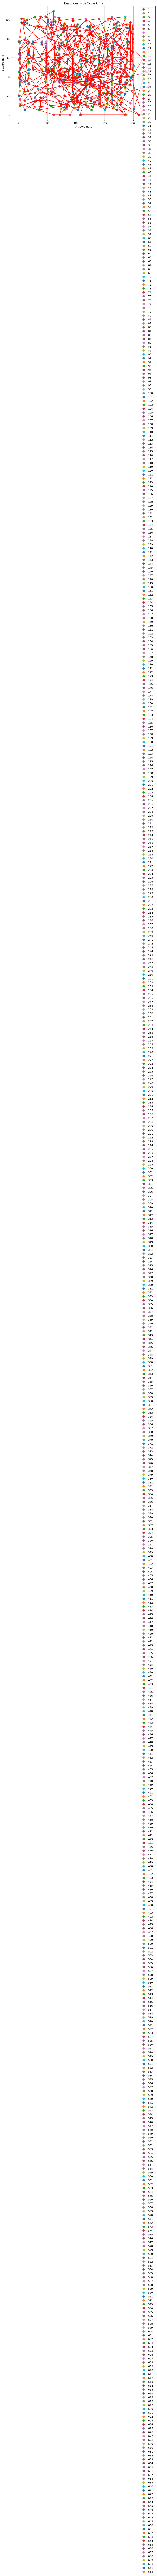

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def read_tsp_file(filename):
    locations = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        node_coord_section = False
        for line in lines:
            if line.startswith("NODE_COORD_SECTION"):
                node_coord_section = True
                continue
            elif line.startswith("EOF"):
                break
            elif node_coord_section:
                parts = line.strip().split()
                node_id = int(parts[0])
                x_coord = float(parts[1])
                y_coord = float(parts[2])
                locations[node_id] = (x_coord, y_coord)
    return locations

# Calculate distance between two locations using Euclidean distance
def distance(location1, location2):
    x1, y1 = location1
    x2, y2 = location2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate total distance of a tour
def total_distance(tour, locations):
    total = 0
    for i in range(len(tour)):
        total += distance(locations[tour[i]], locations[tour[(i + 1) % len(tour)]])
    return total

# Simulated Annealing algorithm with cycle only
def simulated_annealing_with_cycle(locations, initial_temperature=1000, cooling_rate=0.99, num_iterations=100000):
    current_solution = list(locations.keys())
    random.shuffle(current_solution)
    current_cost = total_distance(current_solution, locations)
    best_solution = current_solution[:]
    best_cost = current_cost

    temperature = initial_temperature
    distances = []

    for _ in range(num_iterations):
        # Generate a new solution by swapping two random locations
        new_solution = current_solution[:]
        i, j = random.sample(range(len(new_solution)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        # Calculate the cost of the new solution
        new_cost = total_distance(new_solution, locations)

        # If the new solution is better or accepted by probability, update current solution
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
            current_solution = new_solution[:]
            current_cost = new_cost

            # If the new solution is the best so far, update best solution
            if new_cost < best_cost:
                best_solution = new_solution[:]
                best_cost = new_cost

        # Add current distance to array
        distances.append(current_cost)

        # Cooling schedule
        temperature *= cooling_rate

    # Ensure the tour forms a cycle
    best_solution.append(best_solution[0])

    return best_solution, best_cost, distances

# Read .tsp file
filename = "/content/drive/MyDrive/Datasets/xql662.tsp"
locations_point = read_tsp_file(filename)

# Run simulated annealing to find an optimized tour with cycle only
best_tour, best_cost, distances = simulated_annealing_with_cycle(locations_point)

# Print the results
print("Best tour:", best_tour)
print("Best cost:", best_cost, "km")

# Visualization
plt.figure(figsize=(10, 8))
for city, (x, y) in locations_point.items():
    plt.plot(x, y, 'o', markersize=8, label=str(city))
plt.plot([locations_point[best_tour[i]][0] for i in range(len(best_tour))],
         [locations_point[best_tour[i]][1] for i in range(len(best_tour))],
         'r-')
plt.title('Best Tour with Cycle Only')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()
